In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('ggplot')

In [2]:
# Load the Linnerud dataset
linnerud = datasets.load_linnerud()
X, y = linnerud.data, linnerud.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Create a DataFrame for the Linnerud dataset
df = pd.DataFrame(data=X, columns=linnerud.feature_names)


In [17]:
df

,Weight,Waist,Pulse
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


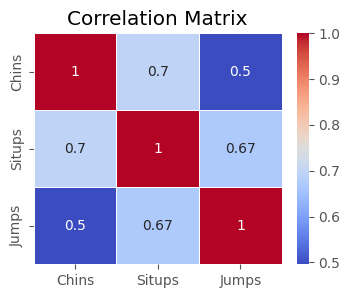

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

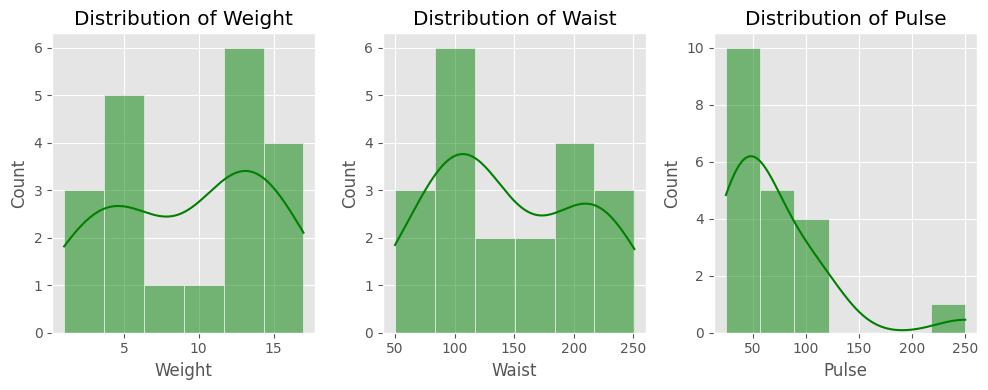

In [7]:
df = pd.DataFrame(data=X, columns=linnerud.target_names)
# Plot the distribution of the target variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Weight'], kde=True, color='green')
plt.title('Distribution of Weight')

plt.subplot(1, 3, 2)
sns.histplot(df['Waist'], kde=True, color='green')
plt.title('Distribution of Waist')

plt.subplot(1, 3, 3)
sns.histplot(df['Pulse'], kde=True, color='green')
plt.title('Distribution of Pulse')

plt.tight_layout()
plt.show()

In [8]:
# Crear y entrenar el modelo de regresión multiobjetivo (ElasticNet)
multioutput_model = MultiOutputRegressor(
    ElasticNet(alpha=0.5, l1_ratio=0.5), n_jobs=-1)
multioutput_model.fit(X_train, y_train)

# Crear y entrenar el modelo de regresor del árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Crea y entrena el modelo de regresor de bosque aleatorio
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Make predictions
multioutput_pred = multioutput_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

In [19]:
import pandas as pd

# Crear un DataFrame para los valores verdaderos
y_test_df = pd.DataFrame(y_test, columns=[f'True_Value_{i+1}' for i in range(y_test.shape[1])])

# Crear DataFrames para las predicciones de cada modelo
multioutput_pred_df = pd.DataFrame(multioutput_pred, columns=[f'Multioutput_Pred_{i+1}' for i in range(multioutput_pred.shape[1])])
tree_pred_df = pd.DataFrame(tree_pred, columns=[f'Tree_Pred_{i+1}' for i in range(tree_pred.shape[1])])
forest_pred_df = pd.DataFrame(forest_pred, columns=[f'Forest_Pred_{i+1}' for i in range(forest_pred.shape[1])])

# Concatenar los DataFrames
results_df = pd.concat([y_test_df.reset_index(drop=True), 
                        multioutput_pred_df.reset_index(drop=True),
                        tree_pred_df.reset_index(drop=True),
                        forest_pred_df.reset_index(drop=True)], axis=1)

# Mostrar el DataFrame
print(results_df)



   True_Value_1  True_Value_2  True_Value_3  Multioutput_Pred_1  \
0         191.0          36.0          50.0          166.523338   
1         157.0          32.0          52.0          149.352003   
2         202.0          37.0          62.0          159.717003   
3         189.0          37.0          52.0          181.704367   

   Multioutput_Pred_2  Multioutput_Pred_3  Tree_Pred_1  Tree_Pred_2  \
0           34.216710           61.467345        189.0         35.0   
1           31.050540           63.947119        154.0         34.0   
2           33.098078           59.692012        166.0         33.0   
3           36.972044           58.095943        138.0         33.0   

   Tree_Pred_3  Forest_Pred_1  Forest_Pred_2  Forest_Pred_3  
0         46.0         170.11          34.29          56.98  
1         64.0         160.69          33.56          56.92  
2         52.0         164.31          33.47          55.96  
3         68.0         160.67          34.86          62.40 

In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calcular métricas para el modelo multioutput
multioutput_mae = mean_absolute_error(y_test, multioutput_pred)
multioutput_mape = mean_absolute_percentage_error(y_test, multioutput_pred) * 100  # Convertir a porcentaje

# Calcular métricas para el modelo de árbol de decisión
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mape = mean_absolute_percentage_error(y_test, tree_pred) * 100  # Convertir a porcentaje

# Calcular métricas para el modelo de bosque aleatorio
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_mape = mean_absolute_percentage_error(y_test, forest_pred) * 100  # Convertir a porcentaje

# Crear un diccionario con las métricas, redondeando a dos decimales
metrics_dict = {
    'Model': ['Multioutput', 'Decision Tree', 'Random Forest'],
    'MAE': [round(multioutput_mae, 2), round(tree_mae, 2), round(forest_mae, 2)],
    'MAPE (%)': [round(multioutput_mape, 2), round(tree_mape, 2), round(forest_mape, 2)]  # Mostrar MAPE en porcentaje
}

# Crear un DataFrame a partir del diccionario
metrics_df = pd.DataFrame(metrics_dict)

# Mostrar el DataFrame
print(metrics_df)


           Model    MAE  MAPE (%)
0    Multioutput  10.02     10.20
1  Decision Tree  12.08     13.03
2  Random Forest  10.66     10.42


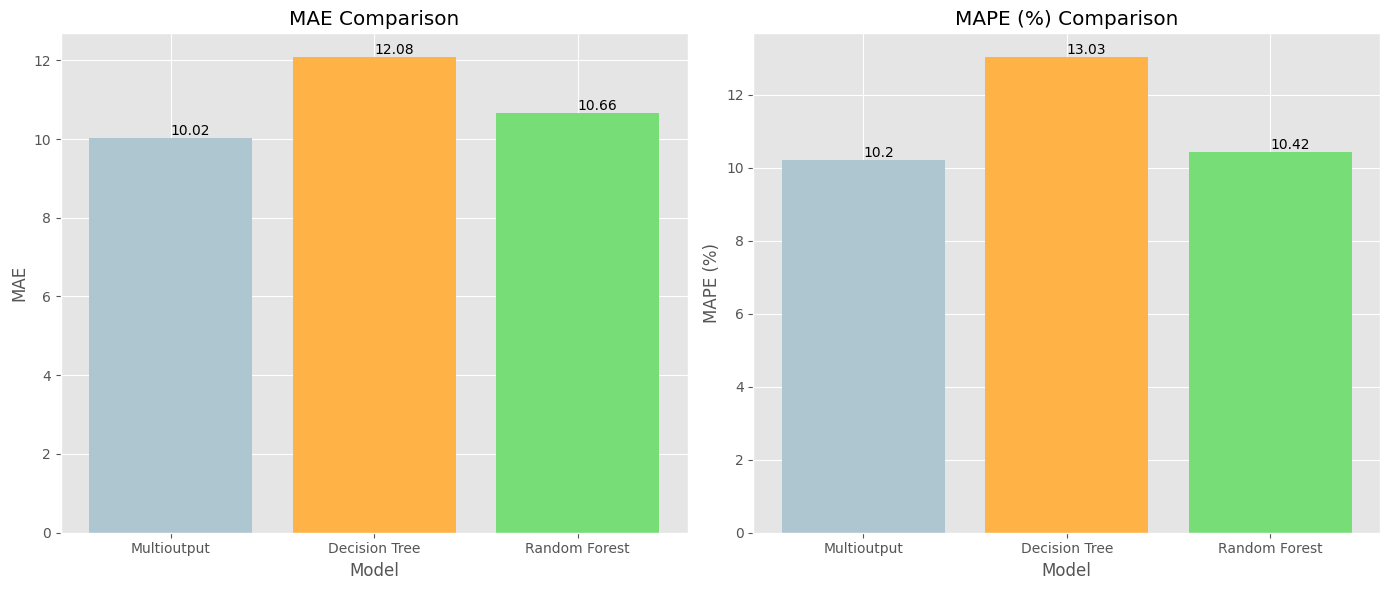

In [14]:
# Crear un gráfico de barras para las métricas con colores pastel
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pastel_colors = ['#AEC6CF', '#FFB347', '#77DD77']

# Gráfico de MAE
bars_mae = ax[0].bar(metrics_df['Model'], metrics_df['MAE'], color=pastel_colors)
ax[0].set_title('MAE Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAE')

# Añadir valores encima de cada barra
for bar in bars_mae:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# Gráfico de MAPE
bars_mape = ax[1].bar(metrics_df['Model'], metrics_df['MAPE (%)'], color=pastel_colors)
ax[1].set_title('MAPE (%) Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MAPE (%)')

# Añadir valores encima de cada barra
for bar in bars_mape:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

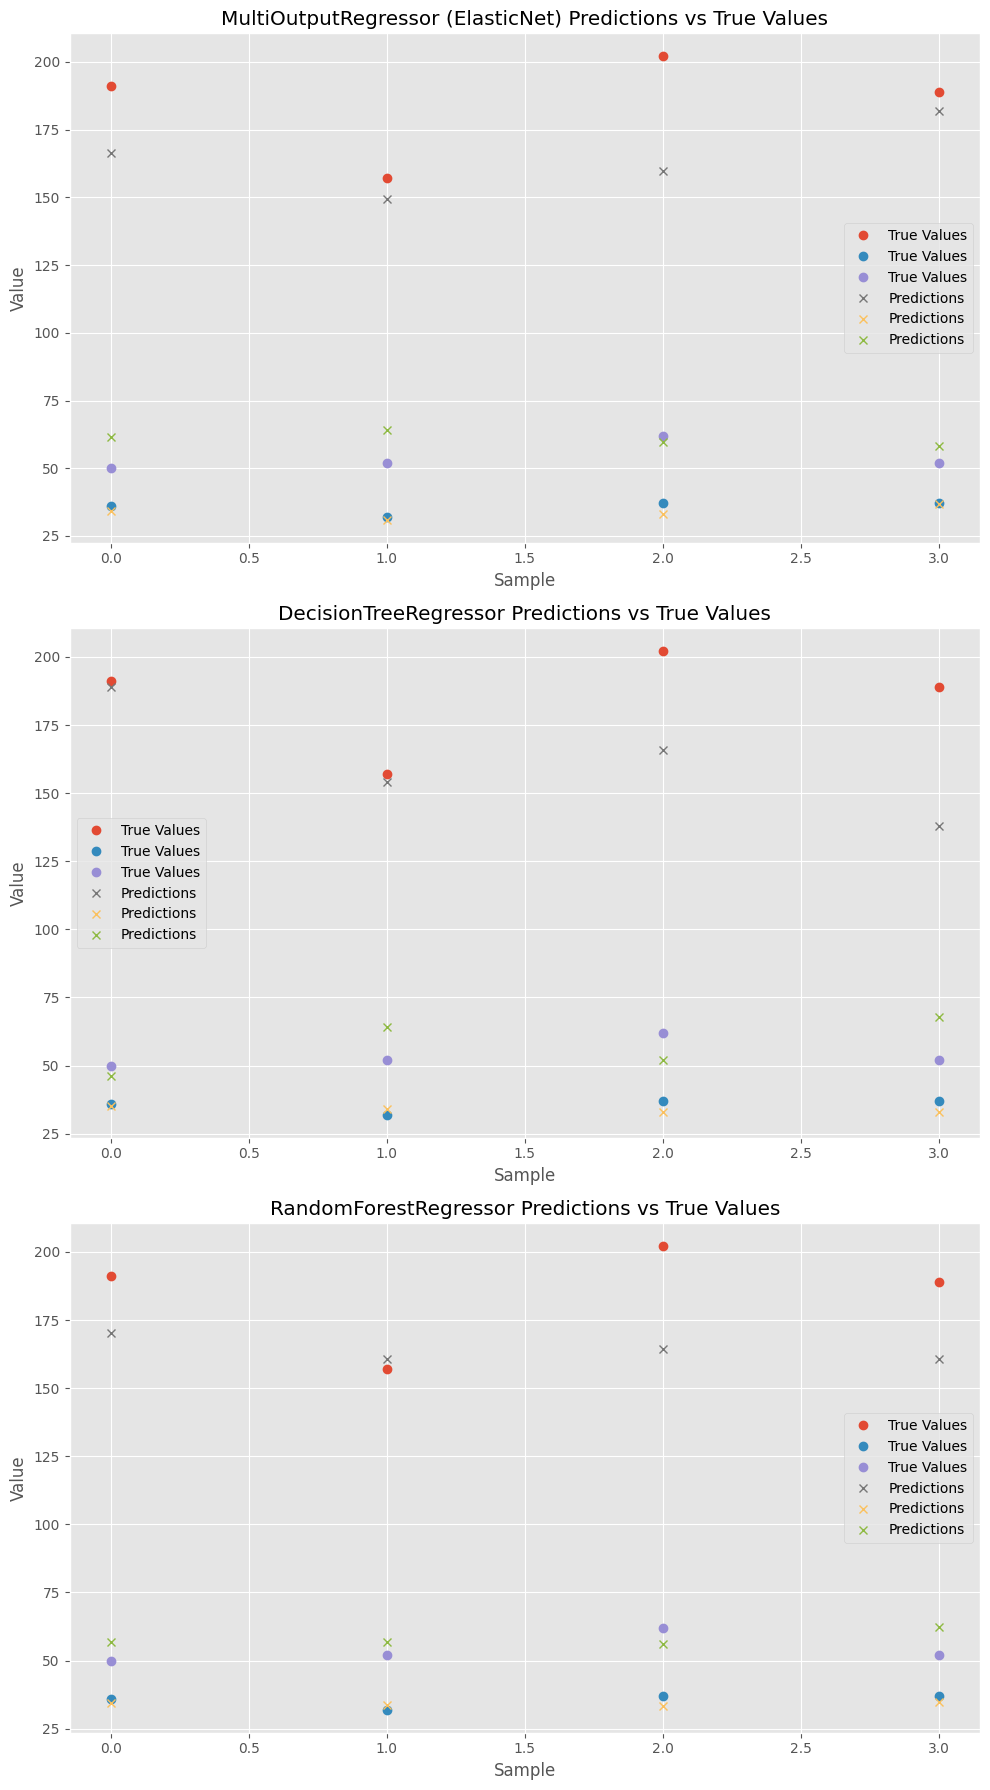

In [15]:
# Crear gráficos comparativos
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Gráfico para el modelo MultiOutputRegressor
axes[0].plot(y_test, label='True Values', marker='o', linestyle='None')
axes[0].plot(multioutput_pred, label='Predictions', marker='x', linestyle='None')
axes[0].set_title('MultiOutputRegressor (ElasticNet) Predictions vs True Values')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Value')
axes[0].legend()

# Gráfico para el modelo DecisionTreeRegressor
axes[1].plot(y_test, label='True Values', marker='o', linestyle='None')
axes[1].plot(tree_pred, label='Predictions', marker='x', linestyle='None')
axes[1].set_title('DecisionTreeRegressor Predictions vs True Values')
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('Value')
axes[1].legend()

# Gráfico para el modelo RandomForestRegressor
axes[2].plot(y_test, label='True Values', marker='o', linestyle='None')
axes[2].plot(forest_pred, label='Predictions', marker='x', linestyle='None')
axes[2].set_title('RandomForestRegressor Predictions vs True Values')
axes[2].set_xlabel('Sample')
axes[2].set_ylabel('Value')
axes[2].legend()

plt.tight_layout()
plt.show()